This notebook is the second part of an introduction to machine learning and implements an Multilayer Perceptron (MLP) for a binary classification task, from scratch.

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

Dim of X: (2, 200)
Dim of Y: (1, 200)


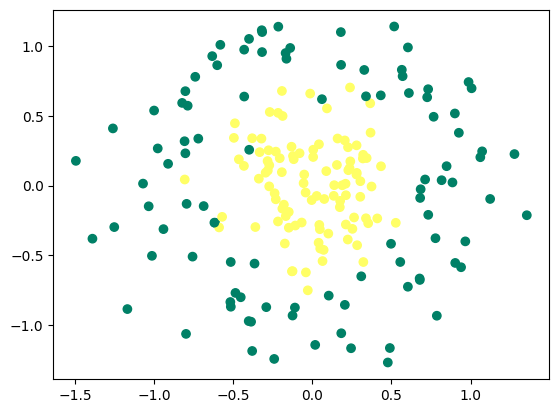

In [6]:
X,Y = make_circles(n_samples=200, noise=0.2, factor=0.3, random_state=0)
X = X.T
Y = Y.reshape((1,Y.shape[0]))

print(f"Dim of X: {X.shape}")
print(f"Dim of Y: {Y.shape}")

plt.scatter(X[0,:], X[1,:], c=Y, cmap='summer')
plt.show()

In [7]:
def initialisation(n0, n1, n2): 
    # n0:nb entree, n1: nb neurone, n2: sortie
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)

    parameters = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    
    return(parameters)

In [8]:
def log_loss(A,Y):
    m = Y.shape[1]
    return(-1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))

In [9]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))

In [10]:
def foward_propagation(parameters, X):
    # we take X through the network and return the activations
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)

    activations = {
        'A1' : A1,
        'A2' : A2
    }

    return activations



In [11]:
def back_propagation(parameters, activations, X, Y):
    m = X.shape[1]
    A1, A2 = activations['A1'], activations['A2']
    W2 = parameters['W2']

    dZ2 = A2 - Y
    dZ1 = (W2.T).dot(dZ2) * A1 * (1 - A1)

    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }

    return(gradients)


In [12]:
def update(parameters, gradients, lr):
    parameters['W1'] -= lr * gradients['dW1']
    parameters['b1'] -= lr * gradients['db1']
    parameters['W2'] -= lr * gradients['dW2']
    parameters['b2'] -= lr * gradients['db2']
    return(parameters)

In [13]:
# we see A as the probability for y=1
def predict(parameters, X):
    activations = foward_propagation(parameters, X)
    return activations['A2'] >= 0.5

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
W2_history, b2_history = [], []

In [16]:
def artificial_neuron(n1, X, Y, lr=0.001, n_iter=200000):
    n0, n2 = X.shape[0], Y.shape[0]
    parameters = initialisation(n0, n1, n2)

    Loss = []
    Acc = []


    for i in range(n_iter):
        activations = foward_propagation(parameters, X)
        
        gradients = back_propagation(parameters, activations, X, Y)
        parameters = update(parameters, gradients, lr)
        if i % 100 == 0:
            Loss.append(log_loss(activations['A2'],Y))
            Y_pred = predict(parameters, X)
            Acc.append(accuracy_score(Y.ravel(), Y_pred.ravel()))
           
        # W_history.append(W.copy())
        # b_history.append(b.copy())
    print(Acc[-1])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.plot(Loss, label="train loss")
    ax1.set_xlabel("steps")
    ax1.set_ylabel("loss")
    ax1.legend()

    ax2.plot(Acc, label="train acc")
    ax2.set_xlabel("steps (/100)")
    ax2.set_ylabel("accuracy")
    ax2.legend()

    plt.tight_layout()
    plt.show()


    return(parameters)
    
    

0.95


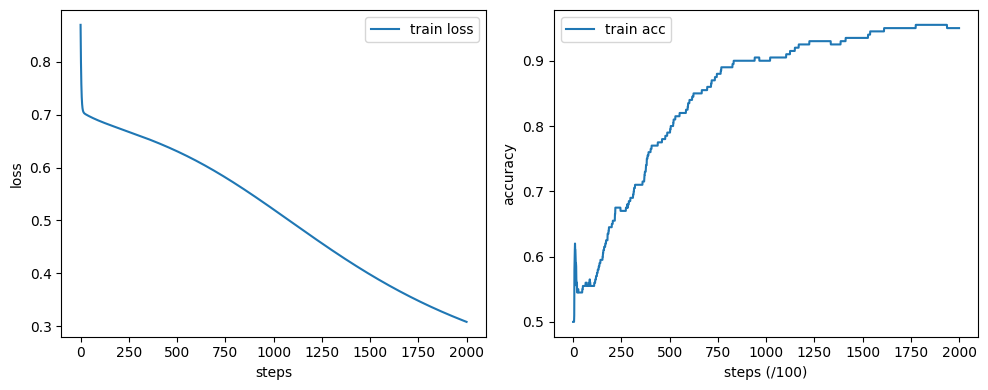

In [17]:
parameters = artificial_neuron(16,X,Y)

Dim of X: (2, 200)
Dim of Y: (1, 200)


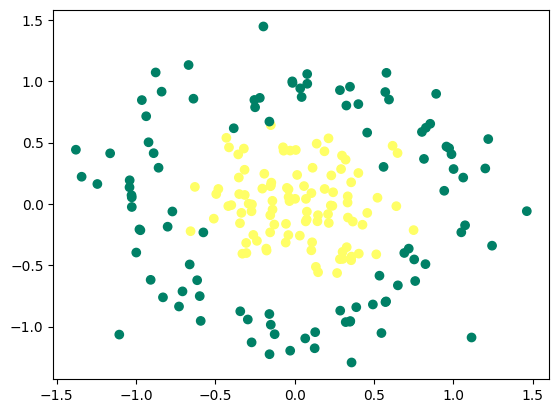

In [18]:
# Tests 

X_test, Y_test = make_circles(n_samples=200, noise=0.2, factor=0.3, random_state=2)
X_test = X_test.T
Y_test = Y_test.reshape((1,Y_test.shape[0]))

print(f"Dim of X: {X_test.shape}")
print(f"Dim of Y: {Y_test.shape}")

plt.scatter(X_test[0,:], X_test[1,:], c=Y_test, cmap='summer')
plt.show()

In [19]:
Y_pt = predict(parameters, X_test)
print(accuracy_score(Y_test.ravel(), Y_pt.ravel()))

0.96


/tmp/ipykernel_3150/2366091407.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


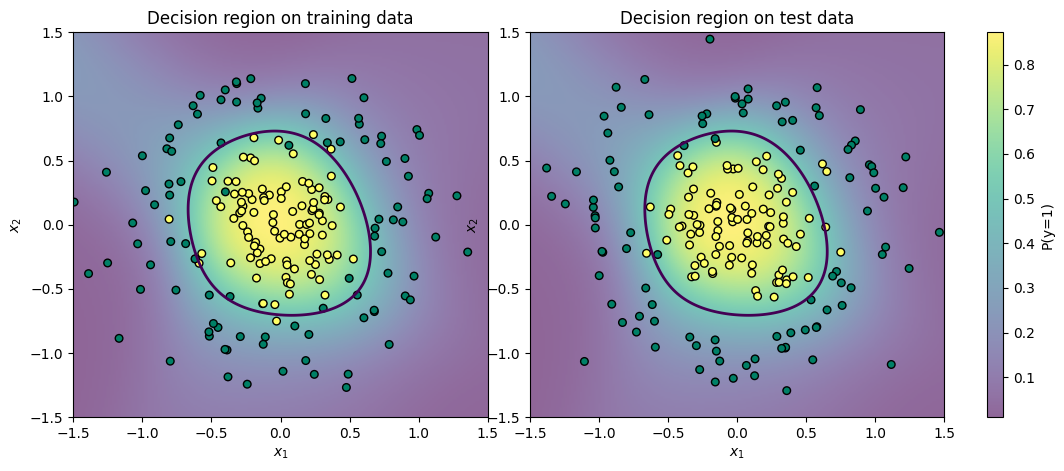

In [28]:
# Drawing the decision bounderie
N = 200
xv = np.linspace(-1.5, 1.5, N)
xx, yy = np.meshgrid(xv, xv)

X_grid = np.vstack([xx.ravel(), yy.ravel()])          # (2, N*N)
A2 = foward_propagation(parameters, X_grid)['A2']     # (1, N*N)
A2_map = A2.reshape(N, N)                             # (N, N)

# --- Plot: train vs test ---
fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 0.04], wspace=0.15)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
cax = fig.add_subplot(gs[0, 2])  # dedicated colorbar axis


# Common background on both axes
for ax in (ax1, ax2):
    im = ax.imshow(
        A2_map,
        extent=[xv.min(), xv.max(), xv.min(), xv.max()],
        origin="lower",
        aspect="auto",
        alpha=0.6
    )
    ax.contour(xx, yy, A2_map, levels=[0.5], linewidths=2)  # decision boundary
    ax.set_xlim(xv.min(), xv.max())
    ax.set_ylim(xv.min(), xv.max())
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

# Scatter train (left)
ax1.scatter(X[0, :], X[1, :], c=Y.ravel(), cmap="summer", edgecolors="k", s=30)
ax1.set_title("Decision region on training data")

# Scatter test (right)
ax2.scatter(X_test[0, :], X_test[1, :], c=Y_test.ravel(), cmap="summer", edgecolors="k", s=30)
ax2.set_title("Decision region on test data")

# One colorbar for the whole figure
cbar = fig.colorbar(im, cax=cax)
cbar.set_label("P(y=1)")

plt.tight_layout()
plt.show()
